# Feedforward ANN: Artificial Neural Network

ML is a lot about geometry and experimentation.

Input only goes in one direction

L : number of layers
W : weight
b : biases

Each naural network layer is a "feature transformation".

Non linear because of sigmoid. If there were no sigmoid, it reduces to a linear equation.

https://playground.tensorflow.org/

One problem with sigmoid is standaziation of each layer since the output of signopid is between 0 and 1, center around 0.5 (not 0), we therefore we use hyperbolic tan, tanh().

Sigmoid has a vanishing gradient since when we do back propagation the gradient becomes so small that we may not even be able to train the first layers. The solution is autoencode which in simply way freeze other layers and let training to be done on single layers.
Another solution is to use ReLU (Rectifier Linear Unit)

Dead neuron : when the total values become less than zero and neuron become useless. To solve this Leaky ReLU LReLU and ELU is introduced.




# Multiclass classification

- Output of the last layer should be a probability value (between 0 and 1)
- Last layer probabilisits has to sum up to one

softmax() satisfy this requirements `nn.Softmax()`
softmax() is an activation function but should NOT be used for hidden layers.

Don't use softmax as a separate activation fnction, use CrossEntropyLoss that  combines softmax + crossentropy


# Image representation

Quantization: continuous value to discrete

We flatten our image H x W x C  


In [ ]:
# MNIST hand writting dataset
# 28*28 in gray scale (0-255)

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

In [ ]:
!ls MNIST/raw

t10k-images-idx3-ubyte	   t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte	   train-images-idx3-ubyte.gz


In [ ]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
batch_size = 128

temp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# maps values to (0,1)
# makes the data of shape (batchsize , color, height, width)
for x,y in temp_loader:
  #print(x)
  print(x.shape)
  print(y.shape)
  break

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)


# total number of iteration is in fact #n_epochs * #batches
for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784) # flattening
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784) # flattening
    # optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # loss.backward()
    # optimizer.step()
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f'Epoch {it+1}/{n_epochs}, Train Loss {train_loss.item():.4f} Test Loss {test_loss.item():.4f}')


Epoch 1/10, Train Loss 0.4075 Test Loss 0.2159
Epoch 2/10, Train Loss 0.1878 Test Loss 0.1528
Epoch 3/10, Train Loss 0.1362 Test Loss 0.1228
Epoch 4/10, Train Loss 0.1065 Test Loss 0.1004
Epoch 5/10, Train Loss 0.0852 Test Loss 0.0935
Epoch 6/10, Train Loss 0.0716 Test Loss 0.0819
Epoch 7/10, Train Loss 0.0597 Test Loss 0.0761
Epoch 8/10, Train Loss 0.0511 Test Loss 0.0766
Epoch 9/10, Train Loss 0.0436 Test Loss 0.0728
Epoch 10/10, Train Loss 0.0366 Test Loss 0.0744


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  if normalize:
    cm=  cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else :
    print("Not normalized confusion matrix")
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i, j], fmt), horizontalalignment="center", color ="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


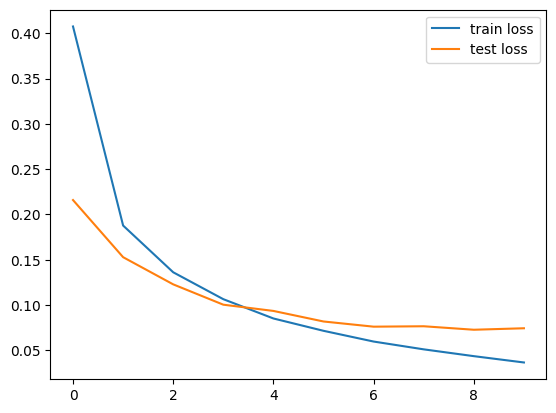

In [ ]:
plt.plot(train_losses, label = "train loss")
plt.plot(test_losses, label = "test loss")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, prediction = torch.max(outputs, 1)
  n_correct  += (prediction == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


Not normalized confusion matrix


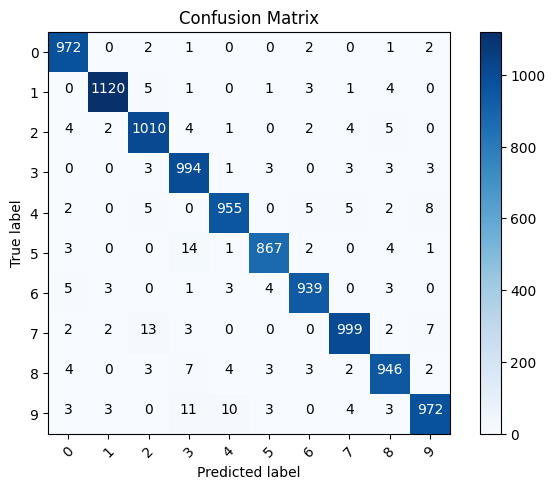

In [ ]:
n_correct = 0
n_total = 0
p_test = np.array([])
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, prediction = torch.max(outputs, 1)
  n_correct  += (prediction == targets).sum().item()
  n_total += targets.shape[0]

  p_test = np.concatenate((p_test, prediction.cpu().numpy()))

test_acc = n_correct / n_total
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4}")

Train acc: 0.9933, Test acc: 0.9774


Text(0.5, 1.0, 'True label: 7 Predicted: 8')

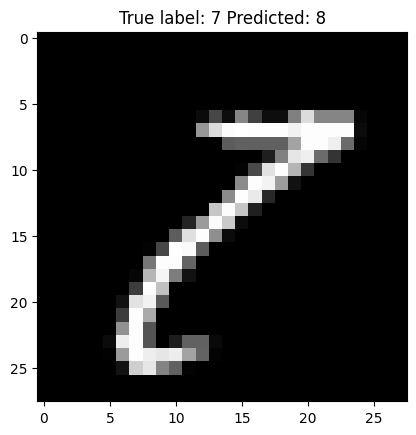

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])) )